# Heart Disease Predicition using Decision Trees

### Dataset Used
* Link: https://archive.ics.uci.edu/ml/datasets/heart+disease
* Exact DataSet Link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

### Importing the required modules

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Reading the data and exploring it

In [120]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [121]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that there are no column names, we just have column numbers. Lets fix that.

* age
* sex
* cp - (Chest Pain)
* restbps - (Resting Blood Pressure)
* chol - (Cholestrol in mg/dl)-
* fbs - (fasting blood sugar)
* restecg - (resting electrocardiographic result)
* thalach - (Maximum heartrate achieved)
* exang - (Exercise induced angina)
* oldpeak - (ST Depression induced by excersise relative to eat)
* slope - (the slope of peak excersie ST segment)
* ca - (number of major vessels (0-3) colored by fluoroscopy)
* thal - (thalium heart scan)
* hd - (Heart Disease - the predicted attribute)

In [122]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
             'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


-------------------------------------------------------------------------------------------------------------------------------
## Data Cleaning


### 1. Identifying missing data 

In [123]:
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Lets check the 'ca' and 'thal' columns as they are the only columns of object type

In [124]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [125]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### 2. Handling missing data 

In [126]:
#Calculate number of rows with the missing data
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [127]:
len(df)

303

So, 6 out of 303 rows contain missing values. This is around 2% of the total data set so we can go ahead and remove these rows and focus on the decision tree

In [128]:
df.drop(df[(df['ca'] == '?') | (df['thal'] == '?')].index, inplace = True)

In [129]:
len(df)
#Should be 303 - 6 = 297

297

In [130]:
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


-------------------------------------------------------------------------------------------------------------------------------
## Format Data for classification

### 1. Split the data into Dependent and Independent Variables

The first step is to split the data into 2 parts:
1. The columns that we will use to make the classification
2. The column that we want to predict

We will use the conventional notation of <b>X</b> (capital X) to represent the columns of data that we will use to make classifications and <b>y</b> (lower case y) to represent the thing we want to predict.

In our case <b>y = hd (heart disease)</b>

In [131]:
#Creatng a copy of df into X and dropping the hd column

X = df.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [132]:
#Making a copy of hd column in y

y = df['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### 2. One-Hot Encoding

Checking the type of columns

For example, 
* age: Is a float
* sex: Is a category
    * 0: Female
    * 1: Male
* cp: Is a category
    * 1: Typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
    
and so on for the rest of the columns.

We need to convert all the categorical columns into multiple columns of binary values. We do this because our library scikit learn only supports continuious data, like <b>age</b> but not categorical data like <b>cp</b>.
This process is called <b> One-Hot Encoding</b>

For our case we will be encoding the following columns - ['cp', 'restecg', 'slope', 'thal']

In [133]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [134]:
#Checking the values in our target columns
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

NOTE: As we can see that the target column (hd/ y) contains values 0,1,2,3,4.
These values correspond to different type of Heart Disease.

For the simplicity of our project, we'll just focus on 2 values
* 0 - Does not have Heart Disease
* 1 - Has Heart Disease

In [135]:
# we will convert all the values for y > 0 to 1
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

-------------------------------------------------------------------------------------------------------------------------------
## Build A Preliminary Classification Tree

Now we split our formatted data into training and testing sets.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

## Creating our first decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

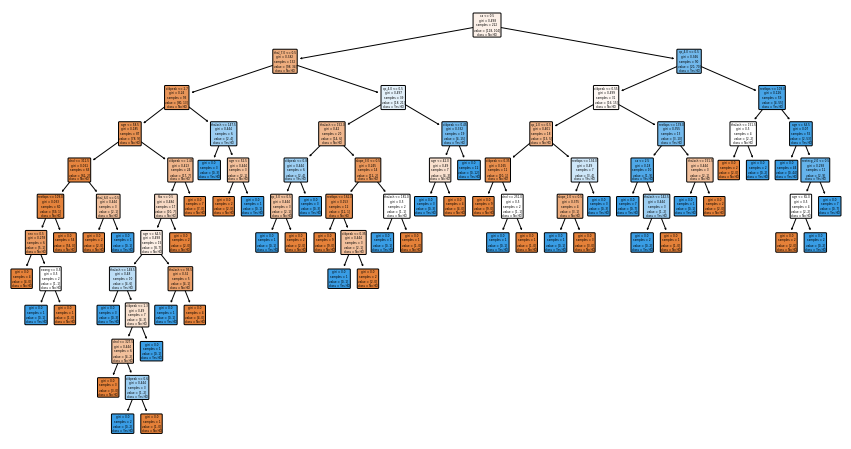

In [137]:
## Printing the tree

plt.figure(figsize = (15, 8))
plot_tree(clf_dt, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns);

#### Our tree is ready, now lets see how it perform against our testing data

We'll draw out the <b>confusion matrix</b> to see the performance

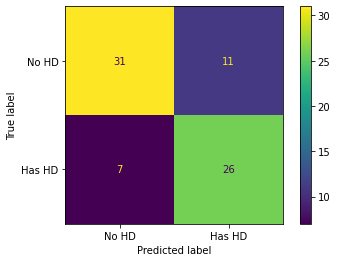

In [138]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Has HD'])

### Observations

* Out of 31+11 = 42 total people who did not have HD, 31 were correctly classified. **(74%)**
* Out of 26+7 = 33 total people who had HD, 26 were correctly classified **(79%)**

## Lets see if we can make these results better by optimising our tree. 

We will prune the tree and see if it makes the resuls better.
For pruning we shall use Cost Complexity Pruning, which prunes the tree by finding the right pruning parameter `alpha`, which controls how little or how much pruning happens

To confirm this value of `alpha`, we will use Cross Validation with 5 data sets.

In [139]:
# Get the alpha and impurtiy values
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # 
path

{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
        0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06463216, 0.08628407, 0.10364689, 0.1156589 ,
        0.12767091, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [140]:
ccp_alphas = path.ccp_alphas # extract only the ccp_alpha values
ccp_alphas = ccp_alphas[1:]
ccp_alphas

array([0.00295295, 0.003861  , 0.00405405, 0.004095  , 0.00429358,
       0.00514801, 0.00541298, 0.00578761, 0.00600601, 0.00600601,
       0.00600601, 0.00667591, 0.00675676, 0.00757375, 0.00811505,
       0.00868726, 0.00889851, 0.01038181, 0.0105777 , 0.01422475,
       0.01604051, 0.01642461, 0.02103075, 0.03680006, 0.03934523,
       0.13046216])

Now to find the best value for the ccp_alpha, we'll cross validate it and find the most efficient one. 

In [141]:
## Creating a list to store the scores
alpha_loop_values = []

## for each alpha we will run a 5-fold cross validation
## we will store the alpha, mean(score) and std(score)
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_loop_values    

[[0.0029529529529529544, 0.6755555555555556, 0.09932976083537857],
 [0.003861003861003862, 0.6799999999999999, 0.09317304439819664],
 [0.004054054054054055, 0.6799999999999999, 0.09317304439819664],
 [0.004095004095004095, 0.6799999999999999, 0.09317304439819664],
 [0.004293579293579285, 0.6799999999999999, 0.09317304439819664],
 [0.005148005148005148, 0.6799999999999999, 0.09317304439819664],
 [0.005412976001211295, 0.7026262626262627, 0.10306466054194952],
 [0.005787605787605791, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006675906675906675, 0.7162626262626264, 0.1039164702661334],
 [0.006756756756756757, 0.7162626262626264, 0.1039164702661334],
 [0.007573750220809049, 0.7027272727272728, 0.12205080223702487],
 [0.008115048793014888, 0.7117171717171716, 0.11635092172398907],
 [0.00868725868

<AxesSubplot:xlabel='alpha'>

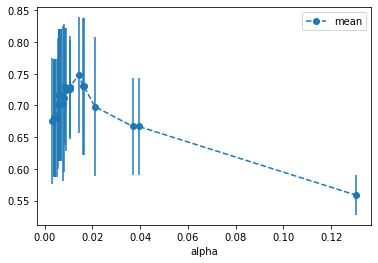

In [142]:
## Now we can plot a groph of the mean and std scores for each alpha value

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean', 'std'])
alpha_results.plot(x='alpha', y='mean', yerr='std', marker='o', linestyle='--')

In [143]:
alpha_results.loc[alpha_results['mean'] == alpha_results['mean'].max()]

,alpha,mean,std
19,0.014225,0.747778,0.091395


In [144]:
ideal_ccp_alpha = alpha_results.loc[19]['alpha']
ideal_ccp_alpha

0.014224751066856332

### Since we got our ideal alpha, we use this to make our new tree and compare the Confusion Matrix

In [145]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

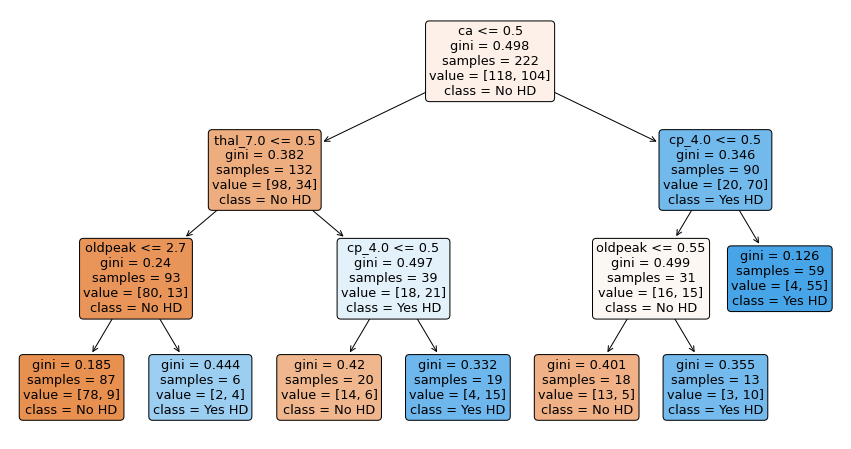

In [146]:
# Now lets look at the tree
plt.figure(figsize = (15, 8))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns);

Lets look at the confusion matrix

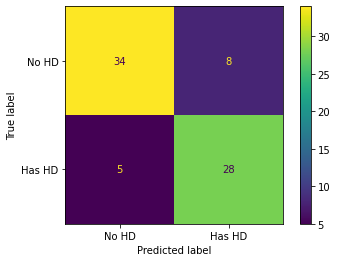

In [147]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['No HD', 'Has HD'])

### Observations

* Out of 34+8 = 42 total people who did not have HD, 34 were correctly classified. **(81%)**
* Out of 5+28 = 33 total people who had HD, 28 were correctly classified **(85%)**
* This is a classic case of over-fitting, our much smaller pruned tree is performing better than the large over-fit tree
